In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sys
import base64
from io import BytesIO
import os

In [3]:
data = pd.read_csv("data/Precipitation.csv", sep=";")
data.head()

,Hidrologic Year,Station,Year Mean,Year Maximum,Year minimum,Year Collected Data,Year Empty Data,Year Collected Data (Percentage),Year Empty Data (Percentage),Sum of the Year
0,1970/1971,JABUGO,2.770330,84.5,0.0,273,92,74.794521,25.205479,756.3
1,1971/1972,JABUGO,2.700820,78.3,0.0,366,0,100.000000,0.000000,988.5
2,1972/1973,JABUGO,2.745753,62.2,0.0,365,0,100.000000,0.000000,1002.2
3,1973/1974,JABUGO,2.378630,65.2,0.0,365,0,100.000000,0.000000,868.2
4,1974/1975,JABUGO,2.202466,62.8,0.0,365,0,100.000000,0.000000,803.9


In [4]:
shape_x = len(set(data["Station"]))
shape_y = len(set(data["Hidrologic Year"]))
print("SHAPEX: ", shape_x)
print("SHAPEY: ", shape_y)

SHAPEX:  5
SHAPEY:  49


In [5]:
square_number = ((np.asarray(data["Sum of the Year"]).round(1)).reshape(shape_y,shape_x))
var_number = ((np.asarray(data["Year Collected Data (Percentage)"])).reshape(shape_y,shape_x))

In [7]:
result = data.pivot(index="Hidrologic Year", columns="Station", values="Year Collected Data (Percentage)")
result.head()

Station,ALAJAR,ARACENA,CORTEGANA,GALAROZA,JABUGO
Hidrologic Year,,,,,
1970/1971,74.794521,74.794521,74.794521,74.794521,74.794521
1971/1972,100.000000,100.000000,100.000000,100.000000,100.000000
1972/1973,100.000000,100.000000,100.000000,100.000000,100.000000
1973/1974,100.000000,100.000000,100.000000,100.000000,100.000000
1974/1975,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
data2 = data.pivot(index="Hidrologic Year", columns="Station", values="Sum of the Year")
labels = data2.values
labels

array([[ 936.3,  500.5,  814.6,  719.5,  756.3],
       [1151.4,  904.5, 1036.3, 1057. ,  988.5],
       [1214.3, 1042. , 1266. , 1105.5, 1002.2],
       [1024.3,  905.5,  930.1,  749.9,  868.2],
       [ 999.6,  725.5,  933.9,  825.5,  803.9],
       [ 873.7,  750. ,  883.7,  915. ,  806.9],
       [1503.3, 1199.5, 1356.2, 1078.5, 1316.9],
       [1692.9, 1426. , 1708.8, 1526. , 1698.7],
       [1718.5, 1232. , 1469.1, 1350.5, 1499.4],
       [ 834.3,  671. ,  836. ,  796. ,  699.6],
       [ 546.4,  475. ,  616.4,  554.5,  531.3],
       [1016.8,  640. ,  883.9,  788.1,  893.5],
       [ 643.5,  431. ,  532.7,  587. ,  557.1],
       [1144.5, 1021. , 1167.9,  986.5,  983.4],
       [1298.1,  920. , 1135.1, 1087.6, 1134.7],
       [1087.5,  839. ,  825.4,  857.7,  850.3],
       [1135.1,  815. , 1089.4, 1087. , 1009.2],
       [1466.6, 1313. , 1396.2, 1278.6, 1148.1],
       [1016.2,  895. ,  932. ,  988.4,  894.5],
       [1602.4, 1475. , 1495. , 1226.1, 1498. ],
       [1077.5,  962

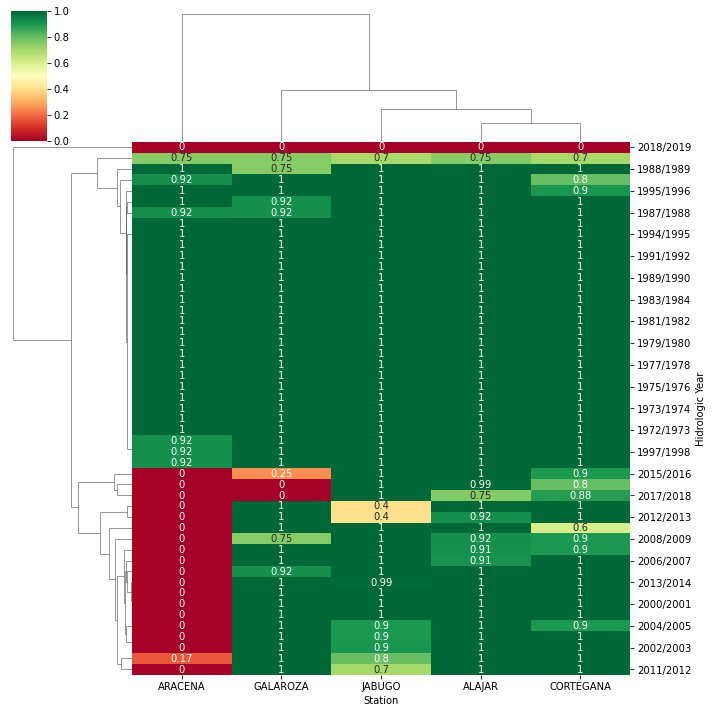

In [14]:
g = sns.clustermap(result, annot=True, standard_scale=1, cmap='RdYlGn')